In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("northwind.db")

In [2]:
# View available tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

name
0             Categories
1        sqlite_sequence
2   CustomerCustomerDemo
3   CustomerDemographics
4              Customers
5              Employees
6    EmployeeTerritories
7          Order Details
8                 Orders
9               Products
10               Regions
11              Shippers
12             Suppliers
13           Territories

In [3]:
# Total Sales per Category
query = """
SELECT c.CategoryName, SUM(od.Quantity * od.UnitPrice) AS TotalSales
FROM [Order Details] od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY TotalSales DESC;
"""
pd.read_sql_query(query, conn)

CategoryName   TotalSales
0       Beverages  92181842.95
1     Confections  66347544.94
2    Meat/Poultry  64896314.41
3  Dairy Products  58034940.00
4      Condiments  55802774.45
5         Seafood  49931965.52
6         Produce  32706403.90
7  Grains/Cereals  28573512.55

In [4]:
# Top 5 Most Sold Products
query = """
SELECT p.ProductName, SUM(od.Quantity) AS TotalUnitsSold
FROM [Order Details] od
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalUnitsSold DESC
LIMIT 5;
"""
pd.read_sql_query(query, conn)


ProductName  TotalUnitsSold
0   Louisiana Hot Spiced Okra          206213
1      Sir Rodney's Marmalade          205637
2  Teatime Chocolate Biscuits          205487
3              Sirop d'√©rable          205005
4         Gumb√§r Gummib√§rchen          204761

In [5]:
# Customers with Most Orders
query = """
SELECT c.CompanyName, COUNT(o.OrderID) AS OrderCount
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY c.CompanyName
ORDER BY OrderCount DESC
LIMIT 5;
"""
pd.read_sql_query(query, conn)

CompanyName  OrderCount
0                   IT         335
1        B's Beverages         210
2   Ricardo Adocicados         203
3    LILA-Supermercado         203
4  Gourmet Lanchonetes         202

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Monthly Sales Trend (Revenue by Month)
query = """
SELECT strftime('%Y-%m', o.OrderDate) AS OrderMonth,
       ROUND(SUM(od.UnitPrice * od.Quantity), 2) AS TotalRevenue
FROM [Order Details] od
JOIN Orders o ON od.OrderID = o.OrderID
GROUP BY OrderMonth
ORDER BY OrderMonth;
"""

monthly_sales = pd.read_sql_query(query, conn)
monthly_sales

OrderMonth  TotalRevenue
0      2012-07    2066219.40
1      2012-08    3556875.79
2      2012-09    3440144.98
3      2012-10    3201529.96
4      2012-11    2980494.74
..         ...           ...
131    2023-06    3071787.73
132    2023-07    3350337.36
133    2023-08    3293158.67
134    2023-09    3544698.51
135    2023-10    2923364.35

[136 rows x 2 columns]

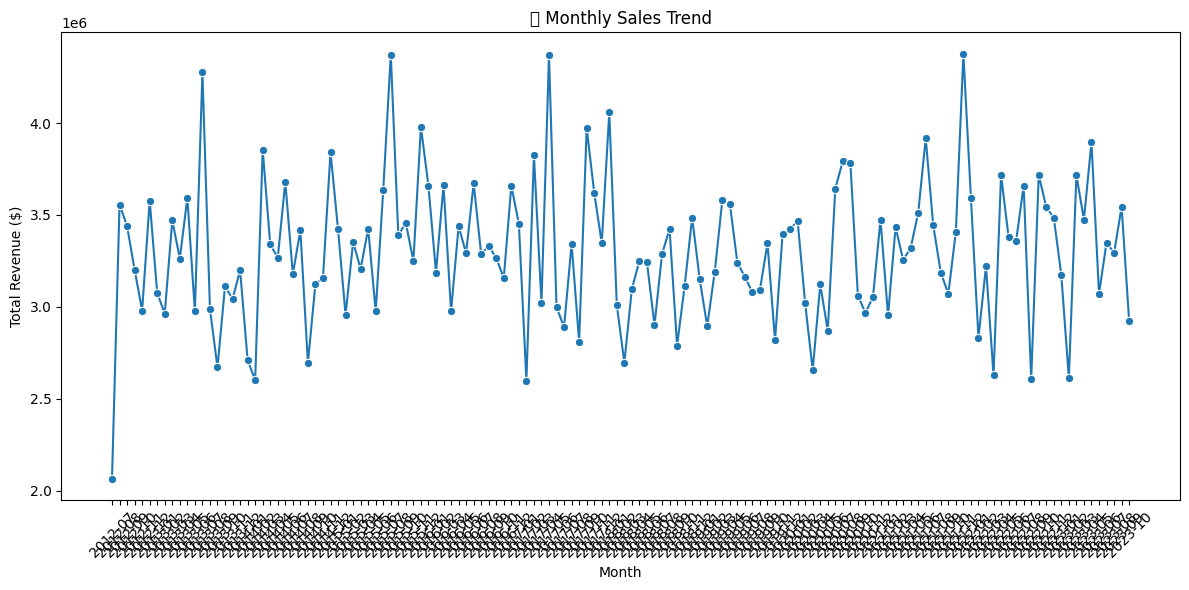

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="OrderMonth", y="TotalRevenue", marker='o')
plt.xticks(rotation=45)
plt.title("üìà Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.tight_layout()
plt.show()

In [22]:
# Top Employees by Revenue Generated
query = """
SELECT e.FirstName || ' ' || e.LastName AS EmployeeName,
       ROUND(SUM(od.UnitPrice * od.Quantity), 2) AS TotalSales
FROM [Order Details] od
JOIN Orders o ON od.OrderID = o.OrderID
JOIN Employees e ON o.EmployeeID = e.EmployeeID
GROUP BY EmployeeName
ORDER BY TotalSales DESC;
"""
employee_sales = pd.read_sql_query(query, conn)
employee_sales

EmployeeName   TotalSales
0  Margaret Peacock  51505691.80
1   Steven Buchanan  51393234.57
2   Janet Leverling  50455812.22
3     Nancy Davolio  49669459.34
4       Robert King  49668627.06
5    Laura Callahan  49287575.56
6    Michael Suyama  49144251.53
7    Anne Dodsworth  49025334.37
8     Andrew Fuller  48325312.27

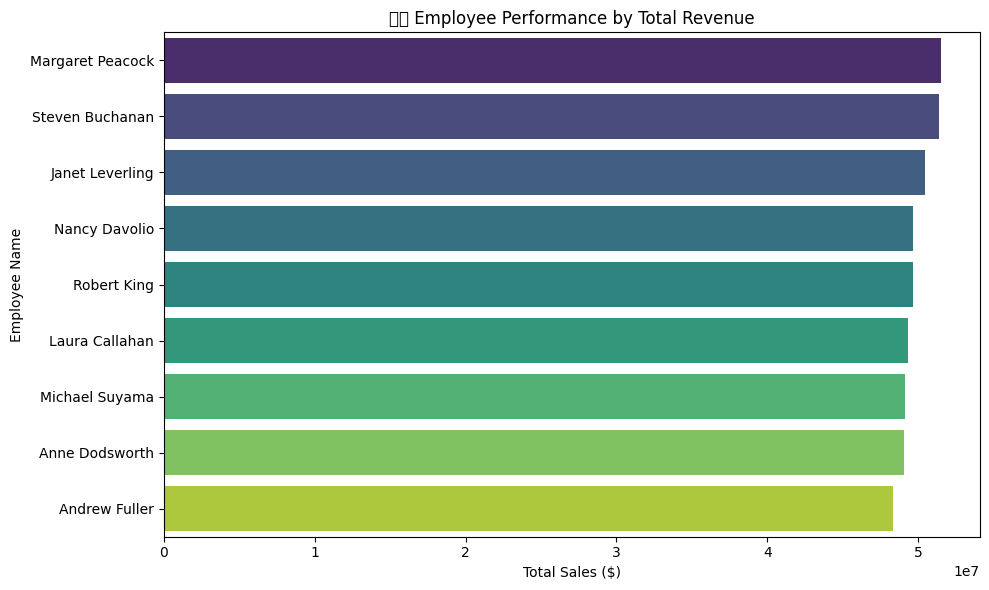

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=employee_sales, x="TotalSales", y="EmployeeName", palette="viridis")
plt.title("üë®‚Äçüíº Employee Performance by Total Revenue")
plt.xlabel("Total Sales ($)")
plt.ylabel("Employee Name")
plt.tight_layout()
plt.show()

In [12]:
# Average Delivery Time by Shipper
query = """
SELECT s.CompanyName AS Shipper,
       ROUND(AVG(julianday(o.ShippedDate) - julianday(o.OrderDate)), 2) AS AvgDeliveryDays
FROM Orders o
JOIN Shippers s ON o.ShipVia = s.ShipperID
WHERE o.ShippedDate IS NOT NULL AND o.OrderDate IS NOT NULL
GROUP BY Shipper
ORDER BY AvgDeliveryDays;
"""
delivery = pd.read_sql_query(query, conn)
delivery

Shipper  AvgDeliveryDays
0    United Package             7.78
1  Federal Shipping             7.82
2    Speedy Express             7.92

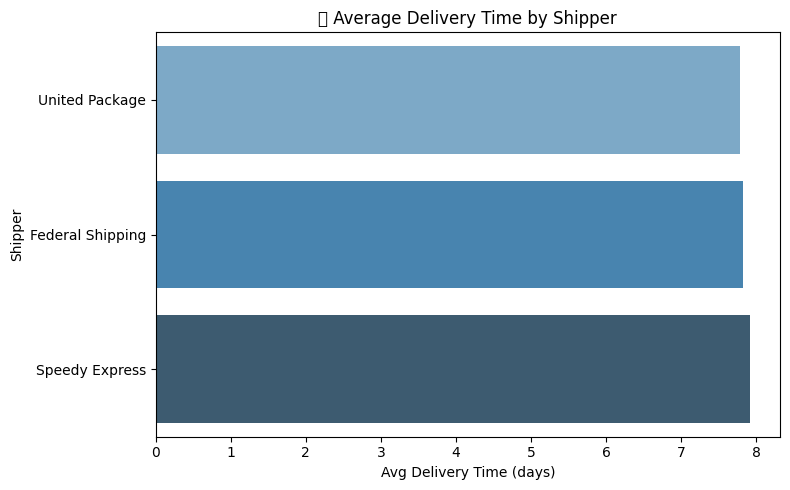

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=delivery, x="AvgDeliveryDays", y="Shipper", palette="Blues_d")
plt.title("üöö Average Delivery Time by Shipper")
plt.xlabel("Avg Delivery Time (days)")
plt.ylabel("Shipper")
plt.tight_layout()
plt.show()

In [16]:
# Returning vs One-Time Customers
query = """
SELECT 
    CASE 
        WHEN OrderCount = 1 THEN 'One-Time Customer'
        ELSE 'Returning Customer'
    END AS CustomerType,
    COUNT(*) AS NumCustomers
FROM (
    SELECT CustomerID, COUNT(OrderID) AS OrderCount
    FROM Orders
    GROUP BY CustomerID
)
GROUP BY CustomerType;
"""
customer_types  = pd.read_sql_query(query, conn)
customer_types 

CustomerType  NumCustomers
0  Returning Customer            93

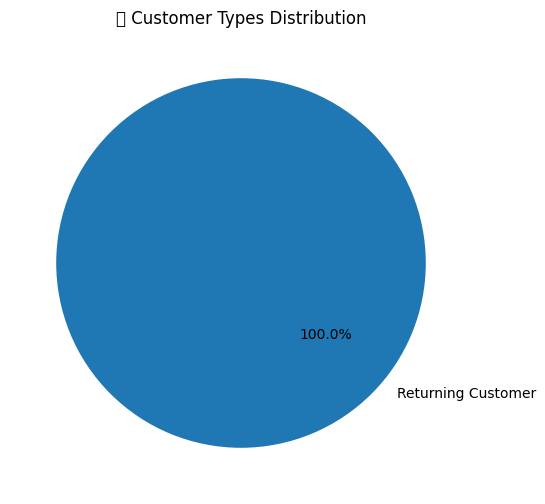

In [25]:
plt.figure(figsize=(6, 6))
plt.pie(customer_types["NumCustomers"],
        labels=customer_types["CustomerType"],
        autopct='%1.1f%%',
        startangle=140)
plt.title("üßæ Customer Types Distribution")
plt.show()